# Pokemon

In this dataset you will explore data related to [Pokemon](https://en.wikipedia.org/wiki/Pok%C3%A9mon). This dataset is from Kaggle:

https://www.kaggle.com/abcsds/pokemon

Before getting started, it is recommended that you read a bit about Pokemon and the variables in this dataset in the links above.

## Imports

In [1]:
import numpy as np
import pandas as pd
import altair as alt
alt.enable_mime_rendering()

## Data

Let's import that dataset as a `DataFrame`:

In [2]:
data = pd.read_csv('/data/pokemon/Pokemon.csv', index_col=0)

In [3]:
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Rename columns to get rid of spaces in the names:

In [4]:
name_map = {'Type 1': 'Type1', 'Type 2': 'Type2', 'Sp. Atk': 'SpAtk', 'Sp. Def': 'SpDef'}
data.rename(columns=name_map, inplace=True)

In [5]:
data.head()

,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Exploratory data analysis

Your task is to explore this dataset using the tools we have learning in the class. The format is centered around questions. For each of the two sections, you should have the following:

1. Start with a question. It is likely that your question will evolve as you explore the dataset. You should put your question in its own markdown cell at the beginning of the section.
2. Perform transformations and visualizations to explore the question. You can create as many code cell as you need to explore the dataset. **For each question, create at least 2 visualizations.**
3. Answer the question based on your explorations. This should be done in a Markdown cell after the code.

Your work will be graded using the following criteria:

* The complexity and significance of your question.
* How effectively your code explores and answers the question.
* The complexity of the transformations/visualizations performed to answer the question. It should be complex enough to be interesting and answer a significant question, but not overly complex.
* The effectiveness of visualizations you perform, including using appropriate visual encodings.
* How well you answer the question after exploring the data with code.

## Question 1

Create as many cells as you need below this one to explore propose, explore and answer your first question.

Intro:
I defined the different tiers of Pokemon to be: Legendary, Mega, and Regular. Legendary is a given type, Mega is an extra evolution for certain pokemon, and Regular is neither of these. I defined a fourth type, Super, to show pokemon that fell into both the Legendary and Mega categories.
Question:
How do the different types (Electric, Rock etc.) and tiers ("Regular", "Legendary", and "Mega") of pokemon compare in average hp, attack, defense, speed, and total?

In [6]:
typesScaleColor = alt.Scale(domain = ["Bug", "Dark", "Dragon", "Electric", "Fairy", "Fighting", "Fire", "Flying", "Ghost", "Grass", "Ground", "Ice", "Normal", "Poison", "Psychic", "Rock", "Steel", "Water"
], range = ['#A6B91A', '#705746', '#6F35FC', '#F7D02C', '#D685AD', '#C22E28', '#EE8130', '#A98FF3', '#735797', '#7AC74C', '#E2BF65', '#96D9D6', '#A8A77A', '#A33EA1', '#F95587', '#B6A136', '#B7B7CE', '#6390F0'])
typesSort = alt.Scale(domain = ["Fire", "Water", "Grass", "Electric", "Psychic", "Ice", "Dragon", "Dark", "Fairy", "Normal", "Fighting", "Flying", "Poison", "Ground", "Rock", "Bug", "Ghost", "Steel"])

In [7]:
data2 = data.copy()
data2['Legend2'] = data['Name'].copy()
for i in iter(list(range(len(data)))[::-1]):
    x = 'n'
    if data2.iloc[i, 0].find("Mega") > 0:
        x = 'y'
    if x == 'y' and data2.iloc[i, 11] == True:
        data2.iloc[i, 12] = "Super"
    elif x == 'y':
        data2.iloc[i, 12] = "Mega"
    elif data2.iloc[i, 11] == True:
        data2.iloc[i, 12] = "Legendary"
    else:
        data2.iloc[i, 12] = "Regular"


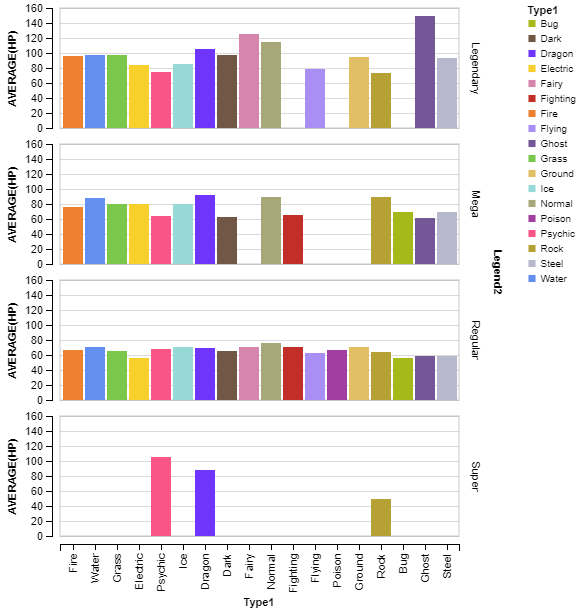

In [8]:
alt.Chart(data2).mark_bar().encode(
    alt.X('Type1', scale = typesSort),
    alt.Y('average(HP)'),
    alt.Color('Type1', scale = typesScaleColor),
    alt.Row('Legend2')
).configure_cell(height = 120, width = 240)

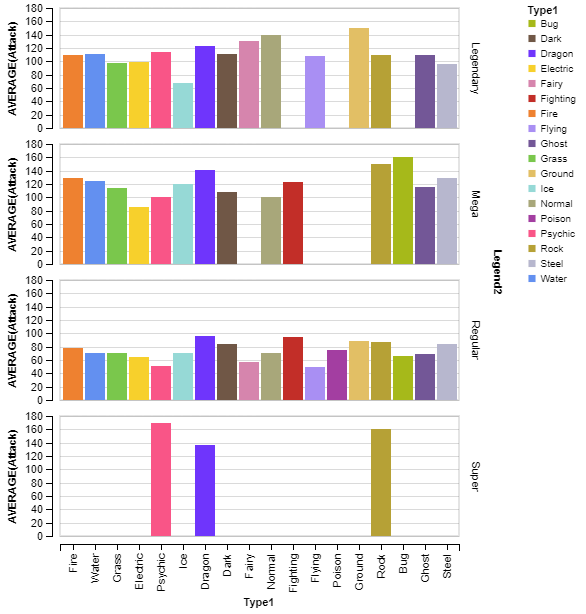

In [9]:
alt.Chart(data2).mark_bar().encode(
    alt.X('Type1', scale = typesSort),
    alt.Y('average(Attack)'),
    alt.Color('Type1', scale = typesScaleColor),
    alt.Row('Legend2')
).configure_cell(height = 120, width = 240)

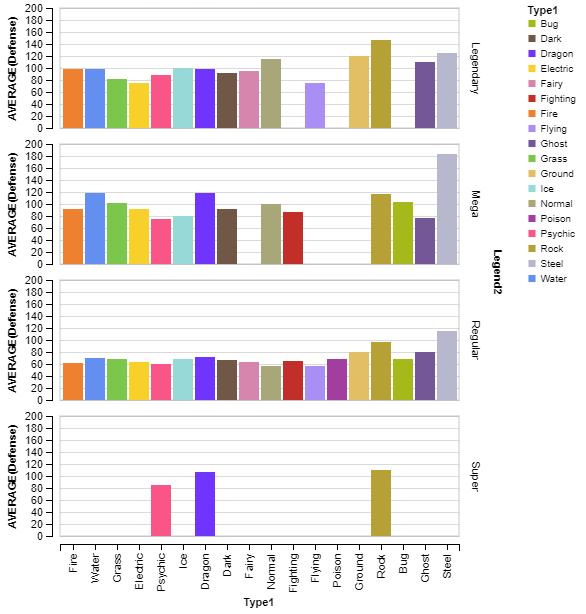

In [10]:
alt.Chart(data2).mark_bar().encode(
    alt.X('Type1', scale = typesSort),
    alt.Y('average(Defense)'),
    alt.Color('Type1', scale = typesScaleColor),
    alt.Row('Legend2')
).configure_cell(height = 120, width = 240)

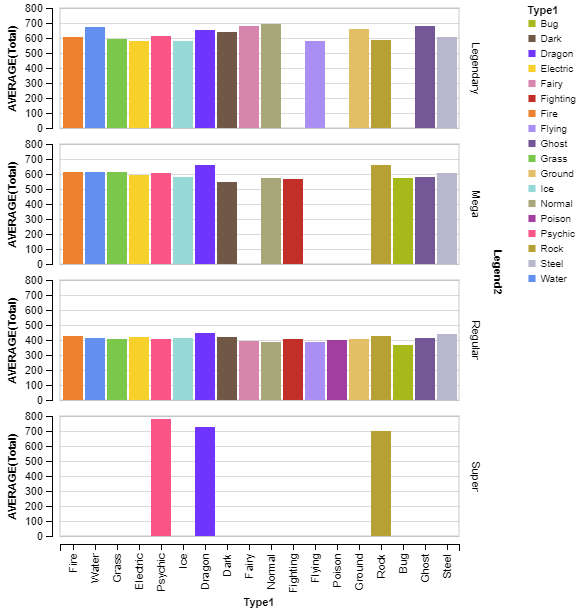

In [11]:
alt.Chart(data2).mark_bar().encode(
    alt.X('Type1', scale = typesSort),
    alt.Y('average(Total)'),
    alt.Color('Type1', scale = typesScaleColor),
    alt.Row('Legend2')
).configure_cell(height = 120, width = 240)

In [12]:
print([data2[data2.Legend2 == 'Super']])

[                      Name    Type1     Type2  Total   HP  Attack  Defense  \
#                                                                            
150    MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190      100   
150    MewtwoMega Mewtwo Y  Psychic       NaN    780  106     150       70   
380      LatiasMega Latias   Dragon   Psychic    700   80     100      120   
381      LatiosMega Latios   Dragon   Psychic    700   80     130      100   
384  RayquazaMega Rayquaza   Dragon    Flying    780  105     180      100   
719    DiancieMega Diancie     Rock     Fairy    700   50     160      110   

     SpAtk  SpDef  Speed  Generation  Legendary Legend2  
#                                                        
150    154    100    130           1       True   Super  
150    194    120    140           1       True   Super  
380    140    150    110           3       True   Super  
381    160    120    110           3       True   Super  
384    180    100    115  

Super comes in as the top ranker in all the three columns where it has data. Legendary comes in second, followed by Mega. Unsurprisingly, Regular is at the far back of the rankings. Psychic comes in at first in total, thanks to the Mega Legendary Mewtwo. As for the rest, Regular was surprisingly balanced between the types. Dragons tended to be strong contenders, and fire/water/grass/electric stayed pretty close.

(Credit to Chris Varanese for his suggestions of color)

In [13]:
assert True # Leave this cell unchanged as the last cell in the section as a placeholder for grading

## Question 2

Create as many cells as you need below this one to explore propose, explore and answer your first question.

Do pokemon get stronger on average with succeeding generations?

In [14]:
genColor = alt.Scale(range = ['#A6B91A', '#705746', '#6F35FC', '#F7D02C', '#D685AD', '#C22E28'])

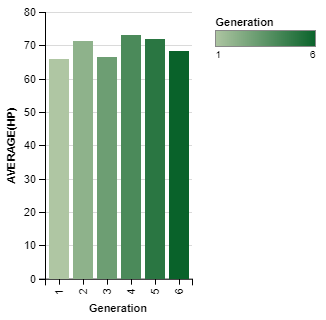

In [15]:
alt.Chart(data).mark_bar().encode(
    alt.X('Generation:O'),
    alt.Y('average(HP)'),
    alt.Color("Generation")
)

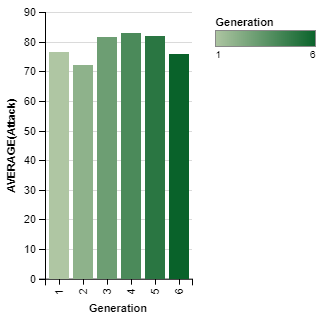

In [16]:
alt.Chart(data).mark_bar().encode(
    alt.X('Generation:O'),
    alt.Y('average(Attack)'),
    alt.Color("Generation")
)

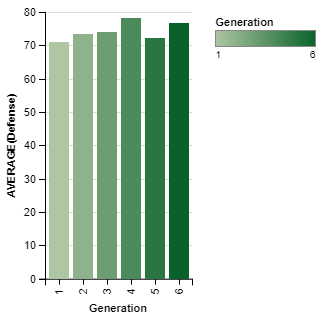

In [17]:
alt.Chart(data).mark_bar().encode(
    alt.X('Generation:O'),
    alt.Y('average(Defense)'),
    alt.Color("Generation")
)

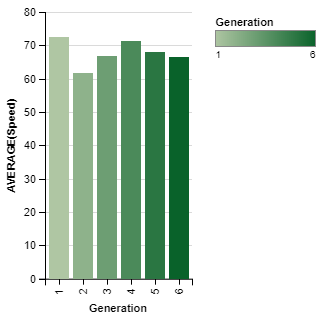

In [18]:
alt.Chart(data).mark_bar().encode(
    alt.X('Generation:O'),
    alt.Y('average(Speed)'),
    alt.Color("Generation")
)

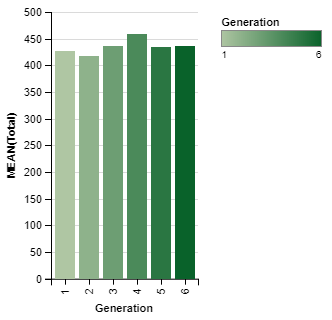

In [19]:
alt.Chart(data).mark_bar().encode(
    alt.X('Generation:O'),
    alt.Y('mean(Total)'),
    alt.Color("Generation")
)

The overall average strength of pokemon did in fact vary with the generation. A followup question to this could be to see if this was all the pokemon, or if there were a few that were a lot stronger than the others.

In [20]:
assert True # Leave this cell unchanged as the last cell in the section as a placeholder for grading